# 1. 잠재 요인 협업 필터링(Latent Factor Collaborative Filtering)

- __사용자-아이템 평점 Matrix 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법__

&nbsp;&nbsp;대규모 다차원 행렬을 __SVD__ 와 __차원 감소 기법__ 으로 분해하는 과정에서 잠재요인을 추출하는데, 이러한 기법을 행렬 분해(Matrix Facotiration)이라고 한다. <br><br>&nbsp;&nbsp;
행렬 분해 기반의 잠재 요인 협업 필터링은 넷플릭스 경연 대회에서 사용되면서 유명해졌다. <br><br>&nbsp;&nbsp;
 우승을 차지한 모델은 행렬 분해 기반의 여러 모델을 결합해 만든 모델이며, 이후 많은 추천 시스템이 행렬 분해에 기반한 잠재 요인 협업 필터링을 적용하고 있다.<br><br>&nbsp;&nbsp;
잠재 요인 협업 필터링은 사용자-아이템 평점 행렬 데이터만을 이용해 말 그대로 '잠재 요인'을 끄집어 내는 것을 의미한다. <br><br>&nbsp;&nbsp;
'잠재 요인'이 어떤것인지는 명확히 정의할 수 없으나, '잠재 요인'을 기반으로 다차원 희소 행렬인 <u>사용자-아이템 행렬</u> 데이터를 <u>저차원 밀집 행렬의 사용자-잠재 요인 행렬</u>과 <u>아이템-잠재 요인 행렬의 전치 행렬</u>(즉, 잠재요인-아이템 행렬)*로 분해할 수 있다. <br><br>&nbsp;&nbsp;


__이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 <u>사용자-아이템 평점 행렬 데이터</u>를 만들어서 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협력 필터링 알고리즘이다.__

__<center> ○행렬 분해를 통한 잠재 요인 협업 필터링○</center>__

![](img/latent_factor.png)
- 위 그림은 행렬 분해 기법을 이용해, <u>사용자-잠재 요인 행렬</u>과 <u>아이템-잠재 요인 행렬의 전치 행렬</u>로 분해된 데이터 세트를 다시 __내적 곱__으로 결합하면서, __사용자가 예측하지 않은 아이템에 대한 평점을 도출하는 방식을 개략적으로 나타낸 것__
<br><br>&nbsp;&nbsp;

행렬 분해에 의해 추출되는 __잠재 요인__이 정확히 어떤 것인지는 알 수 없지만, 가령 영화 평점 기반의 사용자-아이템 평점 행렬 데이터라면 영화가 가지는 장르별 특성 선호도를 가정할 수 있다.

&nbsp; __초반에는 콘텐츠 기반 필터링을 많이 사용했으나, 넷플릭스(Netflix) 추천 시스템 경연 대회에서 행렬 분해(Matrix Factorization) 기법을 이용한 잠재요인 협업 필터링 방식이 우승한 사례 이후 대부분의 온라인 스토어에서 잠재 요인 협업 필터링을 많이 사용하게 되었다고 한다.__<br>&nbsp;
__그러나 서비스 하는 아이템의 특성에 따라 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링 방식을 유지하는 사이트도 많다.__ <br>&nbsp;
__특히, 아마존의 경우는 아직도 아이템 기반의 최근접 이웃 협업 필터링 방식을 추천 엔진으로 사용한다.__

---

# 2. 행렬 분해의 이해
- __행렬 분해란?__ 다차원의 매트릭스를 저차원의 매트릭스로 분해하는 기법
    - 대표적인 기법
        - SVD(Singular Vector Decomposition)
        - NMF(Non-Negative Matrix Factorization)

__SVD(Singular Vector Decomposition)__
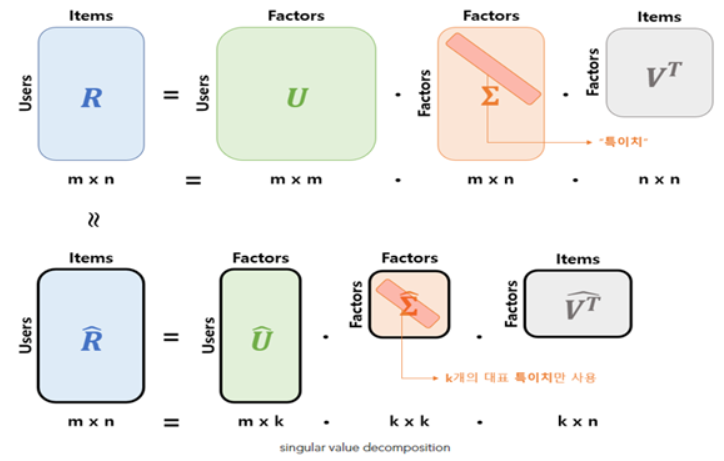
- U: left singular vector, m*m크기의 행렬
- Σ: 비 대각 성분이 0인 m*n크기의 행렬
- V: right singular vector, n*n크기의 행렬
- __K: hyperparameter__

$$ R = U * Σ * V^T$$

__Σ 는 특성들이 얼마나 중요한지를 행렬로 나타내고, 중요한 순서대로 정렬한 후 k개 만큼 자른다.__

<u>행렬분해는 주로 __SVD__ 방식을 사용하지만, __SVD__는 NaN 값이 없는 행렬에만 적용할 수 있다.</u> <br><br>&nbsp;&nbsp;
이러한 경우에는 __확률적 경사 하강법(Stochastic Gradient Descent, SGD)__ 방식이나, __ALS(Alternating Least Squares)__ 방식을 이용해 SVD를 수행합니다. 

### 2.1 경사하강법을 활용한 행렬 분해

$\gamma_{(u,i)} : 예측 \hat{R} 행렬의 u 행, i 열에 위치한 값, p_u * q_i로 계산$<br>
$e_{(u,i)} : u 행, i열에 위치한 실제 행렬값과 예측 행렬 값의 차이 오류, \gamma_{(u,i)} - \hat{\gamma}_{(u,i)}로 계산$<br>
$ \eta : SGD 학습률 $<br>
$ \lambda : L2 규제(Regularization) 계수$<br>

__경사하강법을 위한 회귀 분석의 경우에는 회귀 계수 $w_{1}$, $w_0$ 의 업데이트 값을 회귀 계수에 반복적으로 적용 하여 비용 함수를 최소화 하는것이 핵심__ <br><br>
&nbsp; 평점 행렬을 경사 하강법을 이용해 행렬 분해하는 것도 이와 유사합니다. L2 규제를 반영해 실제 R행렬 값과 예측 R행렬 값의 차이를 최소화하는 방향성을 가지고 P행렬과 Q행렬에 업데이트 값을 반복적으로 수행하면서 최적화된 예측 R 행렬을 구하는 방식이 SGD 기반의 행렬 분해입니다. <br><br>&nbsp;

이제 SGD를 이용해 행렬 분해를 수행하는 예제를 파이썬으로 구현해 보겠습니다. 분해하려는 원본 행렬 $R$을 $P$와 $Q$로 분해한 뒤 다시 $P$와 $Q^T$의 내적으로 예측 행렬을 만드는 예제입니다 . 먼저 원본 행렬 $R$을 $P$와 $Q$로 분해한 뒤에 다시 $P$와 $Q^T$의 내적으로 예측 행렬을 만드는 예제입니다. 먼저 원본 행렬 $R$을 미정인 널 값(np.NaN)을 포함해 생성하고 분해 행렬 $P$와 $Q$는 정규 분포를 가진 랜덤 값으로 초기화합니다. <br>&nbsp;
__잠재 요인 차원은 3으로 설정하겠습니다.__

In [62]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])

num_users, num_items = R.shape
K = 3

#P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)

P = np.random.normal(scale = 1./K, size = (num_users, K))
Q = np.random.normal(scale = 1./K, size = (num_items, K))

print('P shape : ', P.shape)
print('P shape : ', (Q.T).shape)

P shape :  (4, 3)
P shape :  (3, 5)


&nbsp;다음으로 실제 R 행렬과 예측 행렬의 오차를 구하는 __get_rmse()__ 함수를 만들어 보겠습니다. get_rmse() 함수는 실제 R 행렬의 널이 아닌 행렬 값의 위치 인덱스를 추출해 이 인덱스에 있는 실제 $R$ 행렬값과 분해된 $P$, $Q$를 이용해 다시 조합된 예측 행렬값의 RMSE값을 반환합니다. 

In [97]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P 와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
        
    #실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

&nbsp; 이제 SGD 기반으로 행렬 분해를 수행합니다. 먼저 $R$ 에서 널 값을 제외한 데이터의 행렬 인덱스를 추출합니다. steps는 SGD를 반복해서 업데이트할 횟수를 의미하며, learning_rate는 SGD의 학습률, r_lambda는 L2 Regularization 계수입ㄴ디ㅏ. steps = 1000번 동안 반복하면서 
$$
\acute{p_u} = p_u + \eta(e_{(u,i)} * q_i - \lambda * p_u)
$$
$$
\acute{q_i} = q_i + \eta(e_{(u,i)} * p_u - \lambda * q_i)
$$

위의 두 식이 등식이 되도록 새로운 $p_u, q_i$값으로 업데이트합니다. 그리고 get_rmse() 함수를 통해 50회 반복할 때마다 오류 값을 출력합니다. 

In [115]:
# R > 0 인 행 위치, 열 위치 값을 non_zeros 리스트에 저장.
non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]


steps = 1000
learning_rate = 0.01
r_lambda = 0.01


# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):

    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        pred_mat = np.dot(P[i, :], Q[j, :].T)
        eij = r - pred_mat
        
        #Regularization을 반영한 SGD 업데이트 공식 적용
        P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
        Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])   
    
    
    if (step % 100) == 0:
        rmse = get_rmse(R, P, Q, non_zeros)
        print("### iteration Step : ", step, "rmse : ", rmse)

### iteration Step :  0 rmse :  0.5965570416992085
### iteration Step :  100 rmse :  0.021308270574163686
### iteration Step :  200 rmse :  0.01478125302950215
### iteration Step :  300 rmse :  0.01409559767110072
### iteration Step :  400 rmse :  0.013925664713629542
### iteration Step :  500 rmse :  0.013865316062153136
### iteration Step :  600 rmse :  0.013835759124179768
### iteration Step :  700 rmse :  0.013816652033622954
### iteration Step :  800 rmse :  0.013801716666489581
### iteration Step :  900 rmse :  0.013788700036386364


In [118]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬 : \n', np.round(pred_matrix, 3))
print('\n기존 행렬 : \n', np.round(R, 3))

예측 행렬 : 
 [[3.992 2.138 1.13  1.997 1.6  ]
 [3.89  4.978 1.445 2.988 1.007]
 [5.357 3.524 2.988 3.981 3.984]
 [4.973 2.001 1.004 2.002 1.663]]

기존 행렬 : 
 [[ 4. nan nan  2. nan]
 [nan  5. nan  3.  1.]
 [nan nan  3.  4.  4.]
 [ 5.  2.  1.  2. nan]]


&nbsp;__원본 행렬과 비교해 NaN이 아닌 값은 큰 차이가 나지 않으며, NaN인 값은 새로운 예측값으로 채워졌습니다.__ <br>
추후, 행렬 분해를 이ㅏ용한 잠재 요인 협업 필터링 실습에서 이 예제의 상당 부분을 그대로 이용해 __사용자-영화 평점 행렬__을 행렬 분해 하고 영화를 추천하는 로직을 구현해 보겠습니다. 